# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math

# Loading Image

In [2]:
img_path = './flower.jpg'
rgb = plt.imread(img_path)
print(rgb.shape)

(427, 640, 3)


In [3]:
grayscale = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
print(grayscale.shape)

(427, 640)


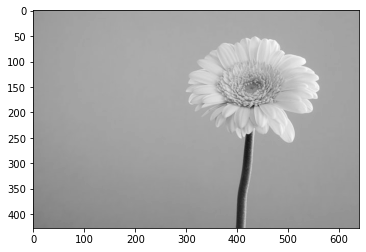

In [4]:
plt.imshow(grayscale,cmap = 'gray')

### Left Shift

In [5]:
def left_shift(img):

    m, n = img.shape
    processed_img = img.copy()
    for x in range(m):
        for y in range(n):
            processed_img[x, y] = processed_img[x, y] - 80
            if(processed_img[x, y] < 0):
                processed_img[x, y] = 0

    return processed_img

# Right Shift

In [6]:
def right_shift(img):

    m, n = img.shape
    processed_img = img.copy()
    for x in range(m):
        for y in range(n):
            processed_img[x, y] = processed_img[x, y] + 50
            if(processed_img[x, y] > 255):
                processed_img[x, y] = 155

    return processed_img

# Specific Range

In [25]:
def specific_range(img, T1, T2):
    m, n = img.shape
    processed_img = img.copy()
    for x in range(m):
        for y in range(n):
            if(processed_img[x, y] <= T1):
                processed_img[x, y] = T1
            if(processed_img[x, y] >= T2): 
                processed_img[x, y] = T2

    return processed_img

# Plotting Image

In [8]:
def plot_img(img_set, title_set, hist_set):
    n = len(img_set)
    plt.figure(figsize = (20, 30))
    j = 0
    for i in range(n):
        img = img_set[i]
        plt.subplot(4, 2, j + 1)
        plt.imshow(img_set[i],cmap='gray')
        plt.title(title_set[i])
        
        plt.subplot(4, 2, j + 2)
        plt.plot(hist_set[i])
        plt.title(title_set[i])
        j = j + 2
    plt.savefig('./Output.png')

# Calling the Conditions

In [9]:
gray_hist = cv2.calcHist([grayscale],[0],None,[256],[0,256])

In [10]:
left_shift = left_shift(grayscale)

In [11]:
left_shift_hist = cv2.calcHist([left_shift],[0],None,[256],[0,256])

In [12]:
right_shift = right_shift(grayscale)

In [13]:
right_shift_hist = cv2.calcHist([right_shift],[0],None,[256],[0,256])

In [38]:
spec_range = specific_range(grayscale, 160, 180)

In [39]:
spec_range_hist =  cv2.calcHist([spec_range],[0],None,[256],[0,256])

# showing the image

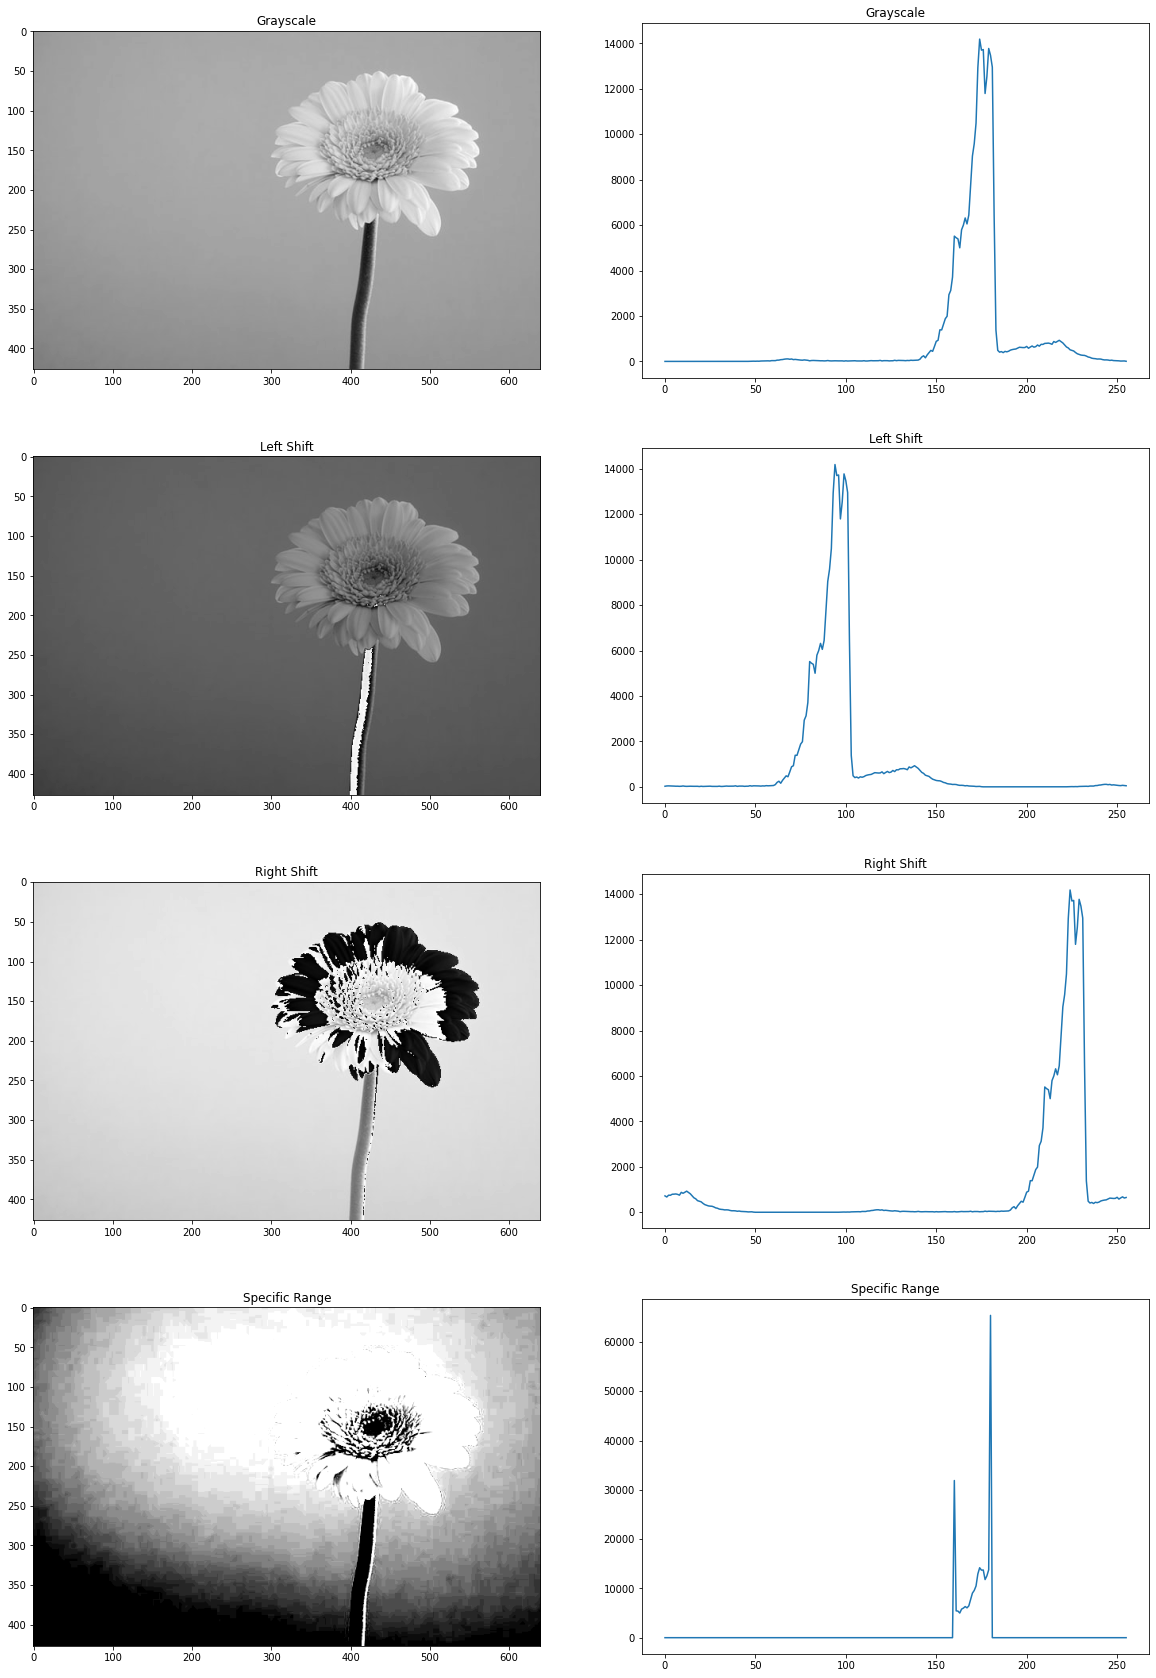

In [40]:
img_set = [grayscale, left_shift, right_shift, spec_range]

title_set = ['Grayscale', 'Left Shift', 'Right Shift', 'Specific Range']

hist_set = [gray_hist, left_shift_hist, right_shift_hist, spec_range_hist]

plot_img(img_set, title_set, hist_set)